# Figuring Our Which Customers May Leave - Churn Analysis
About our Dataset
Source - https://www.kaggle.com/blastchar/telco-customer-churn

We have customer information for a Telecommunications company
We've got customer IDs, general customer info, the servies they've subscribed too, type of contract and monthly charges.
This is a historic customer information so we have a field stating whether that customer has churnded Field Descriptions
1.customerID - Customer ID
2.gender - Whether the customer is a male or a female
3.SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
4.Partner - Whether the customer has a partner or not (Yes, No)
5.Dependents - Whether the customer has dependents or not (Yes, No)
6.tenure - Number of months the customer has stayed with the company
7.PhoneService - Whether the customer has a phone service or not (Yes, No)
8.MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
9.InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
10.OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
11.OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
12.DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
13.TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
14.StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
15.StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
16.Contract - The contract term of the customer (Month-to-month, One year, Two year)
17.PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
18.PaymentMethod - The customer’s payment method (Electronic check, Mailed check Bank transfer (automatic), Credit card (automatic))
19.MonthlyCharges - The amount charged to the customer monthly
20.TotalCharges - The total amount charged to the customer
Target -:Churn - Whether the customer churned or not (Yes or No)
Customer Churn - churn is when an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with a company.

Aim - is to figure our which customers may likely churn in future

In [342]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [343]:
# Load our data
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/WA_Fn-UseC_-Telco-Customer-Churn.csv"
churn_df = pd.read_csv(file_name)
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [344]:
print("no of Rows in dataset:",   churn_df.shape[0])
print("no of Columns in dataset:",   churn_df.shape[1])
print("\n features :",  churn_df.columns.tolist())
print("no of null values in dataset :",churn_df.isnull().sum().values.sum())
print("\n unique values:",churn_df.nunique())

no of Rows in dataset: 7043
no of Columns in dataset: 21

 features : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
no of null values in dataset : 0

 unique values: customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [345]:
print(churn_df['Churn'].unique())
print(churn_df['SeniorCitizen'].unique())
print(churn_df['PhoneService'].unique())
print(churn_df['DeviceProtection'].unique())

['No' 'Yes']
[0 1]
['No' 'Yes']
['No' 'Yes' 'No internet service']


In [346]:
churn_df['Churn'].value_counts(sort =False)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [347]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

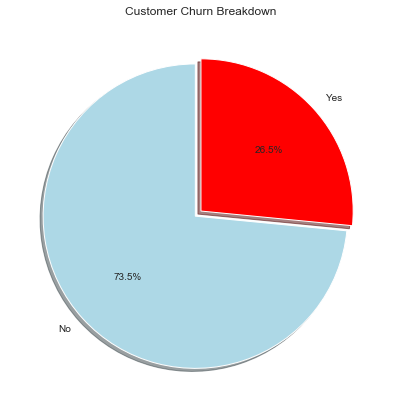

In [348]:
from pylab import rcParams
labels = churn_df['Churn'].value_counts(sort = True).index
sizes = churn_df['Churn'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
rcParams['figure.figsize'] = 7,7
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

out of 7043 73.0 customer are going to stay and 27.0 customer are going to leave


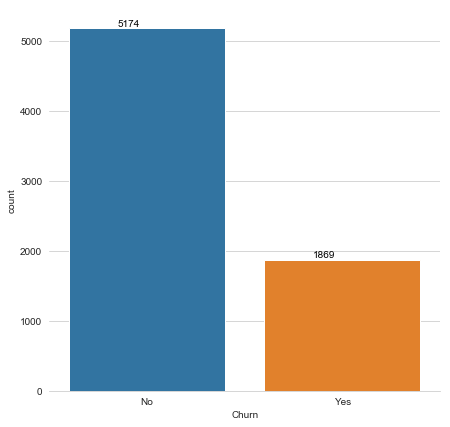

In [349]:
sns.set_style(style='whitegrid')
ax = sns.countplot(churn_df['Churn'])
sns.despine(left=True)
customer_stay = round((churn_df['Churn'].value_counts().values[0]/7043)*100)
customer_leave = round((churn_df['Churn'].value_counts().values[1]/7043)*100)
print("out of 7043 {} customer are going to stay and {} customer are going to leave".format(customer_stay,customer_leave))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

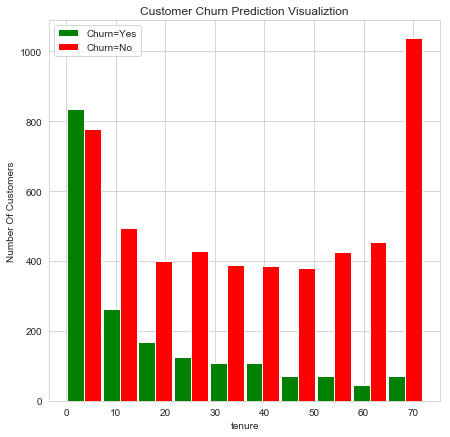

In [350]:
tenure_churn_no = churn_df[churn_df.Churn=='No'].tenure
tenure_churn_yes = churn_df[churn_df.Churn=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

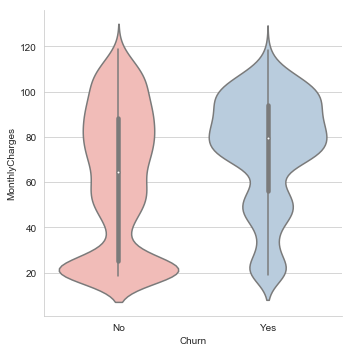

In [351]:
# Create a Volin Plot showing how monthy charges relate to Churn
# We an see that Churned customers tend to be higher paying customers
g = sns.factorplot(x="Churn", y = "MonthlyCharges",data = churn_df, kind="violin", palette = "Pastel1")

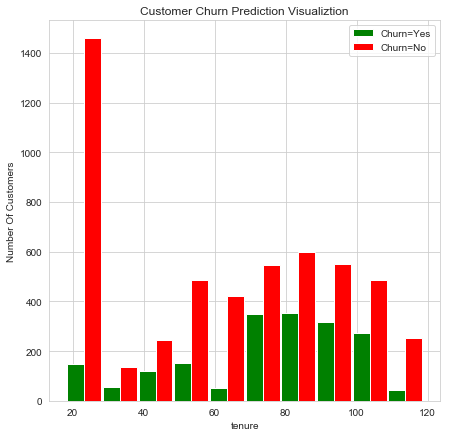

In [352]:
tenure_churn_no = churn_df[churn_df.Churn=='No'].MonthlyCharges
tenure_churn_yes = churn_df[churn_df.Churn=='Yes'].MonthlyCharges
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [353]:
len(churn_df[churn_df['TotalCharges'] == " "])

11

In [354]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'],errors='coerce')       

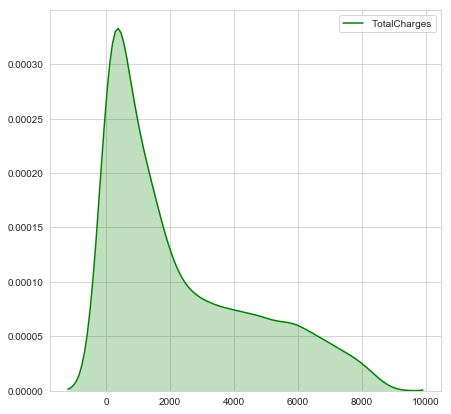

In [355]:
sns.kdeplot(churn_df["TotalCharges"], shade=True, color="g")

In [356]:
churn_df.drop('customerID',axis=1,inplace=True)

In [357]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [358]:
gender = {'Female':0,'Male':1}
churn_df['gender'] = churn_df['gender'].map(gender)

In [359]:
churn_df.gender.unique()

array([0, 1], dtype=int64)

In [360]:
for col in churn_df.columns:
    if churn_df[col].dtypes == 'object':
        print(f'{col}: {churn_df[col].unique()}')

Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [361]:
cat_col = churn_df.select_dtypes(exclude=['int','float']).columns
print("categorical columns are: {}".format(cat_col))

categorical columns are: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')


In [362]:
churn_df.replace({'No internet service':'No'},inplace=True)
churn_df.replace({'No phone service':'No'},inplace=True)

In [363]:
churn_df[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [364]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn']
for col in columns:
    churn_df[col] = le.fit_transform(churn_df[col])

In [365]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [366]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
churn_df_minmax_transform = pd.DataFrame(data = churn_df)
churn_df_minmax_transform[numerical] = scaler.fit_transform(churn_df_minmax_transform[numerical])
churn_df_minmax_transform.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,0,0,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,0,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,0,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,0,0,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [367]:
churn_df = churn_df_minmax_transform

In [368]:
churn_df.shape

(7043, 20)

In [369]:
churn_df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [370]:
churn_df.dropna(inplace=True)

In [371]:
churn_df.isnull().sum().values.any()

False

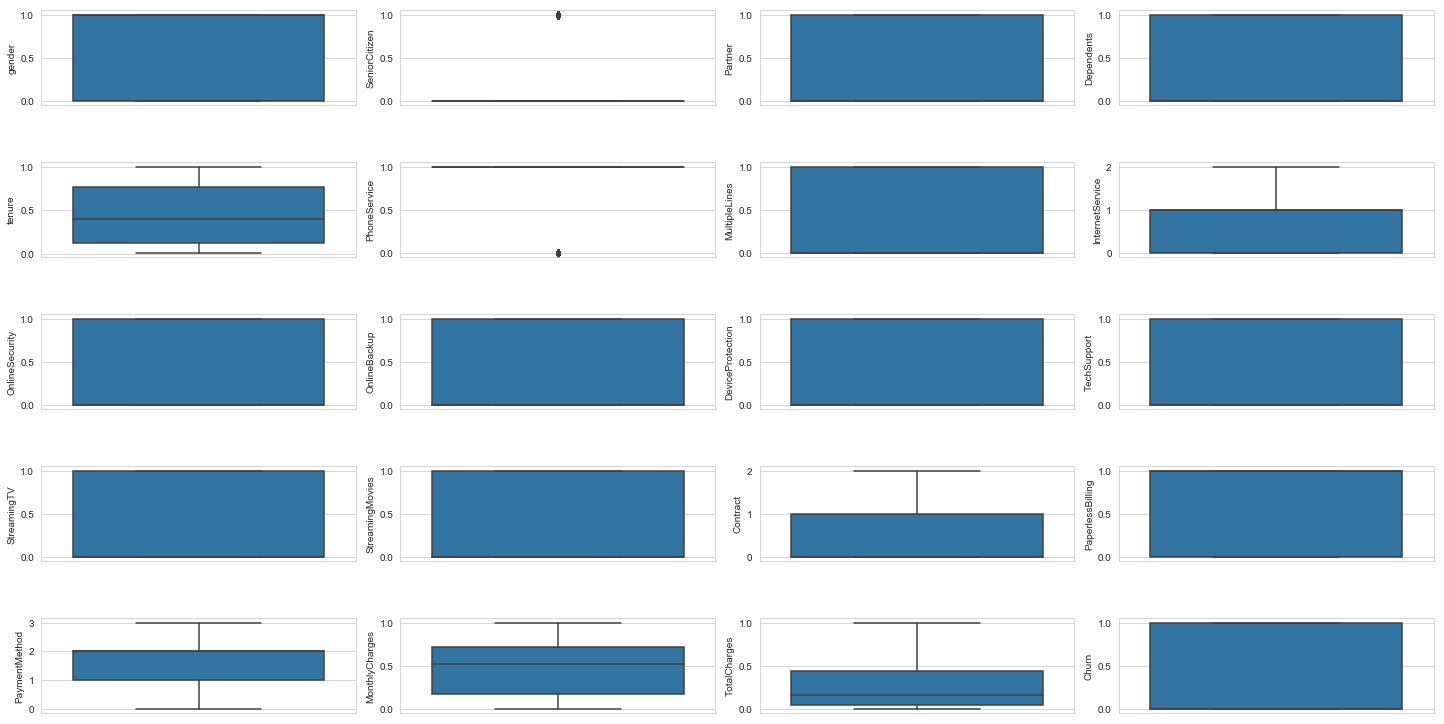

In [372]:
# create box plots
fig, ax = plt.subplots(ncols=4, nrows=5, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in churn_df.items():
    if col != 'churn':
        sns.boxplot(y=col, data=churn_df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [373]:
#Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(churn_df))
print(churn_df.shape)
churn_df_final = churn_df.loc[(zscore<3).all(axis=1)]
print(churn_df_final.shape)

(7032, 20)
(6352, 20)


In [374]:
churn_df = churn_df_final

In [375]:
X = churn_df.drop('Churn',axis=1)
y = churn_df['Churn']
print('shape of X is {}'.format(X.shape))
print('shape of y is {}'.format(y.shape))

shape of X is (6352, 19)
shape of y is (6352,)


In [376]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4446, 19)
Number transactions y_train dataset:  (4446,)
Number transactions X_test dataset:  (1906, 19)
Number transactions y_test dataset:  (1906,)


In [377]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [378]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [379]:
classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['LogisticRegression :', LogisticRegression()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()]]
              

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" : ")] = predictions
    print(name, accuracy_score(y_test, predictions))      

DecisionTree : 0.7413431269674712
RandomForest : 0.7885624344176285
Naive Bayes : 0.7345225603357818
KNeighbours : 0.7413431269674712
SVM : 0.7859391395592865
LogisticRegression : 0.7848898216159497
ExtraTreesClassifier : 0.7812172088142707
AdaBoostClassifier : 0.7964323189926548
GradientBoostingClassifier:  0.7969569779643232


accuracy_score: 0.7848898216159497
[[1236  185]
 [ 225  260]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1421
           1       0.58      0.54      0.56       485

    accuracy                           0.78      1906
   macro avg       0.72      0.70      0.71      1906
weighted avg       0.78      0.78      0.78      1906



Text(0.5, 77.01999999999997, 'Predicted label')

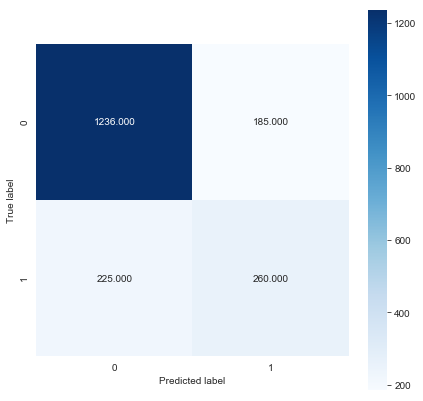

In [380]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size":10}, 
            cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# AUC and ROC Curve

In [381]:
from sklearn.metrics import roc_auc_score

In [382]:
y_pred_prob = model.predict_proba(X_test)[:,1]

In [383]:
y_pred_prob

array([0.34708184, 0.2878716 , 0.01131836, ..., 0.448707  , 0.0939786 ,
       0.06338018])

In [384]:
tpr,fpr,thresholds = roc_curve(y_test,y_pred_prob)

In [385]:
tpr[:5]

array([0.        , 0.        , 0.        , 0.00070373, 0.00070373])

In [386]:
fpr[:5]

array([0.        , 0.00206186, 0.05360825, 0.05360825, 0.07010309])

In [387]:
thresholds[:5]

array([1.86376505, 0.86376505, 0.80525707, 0.80401869, 0.79156066])

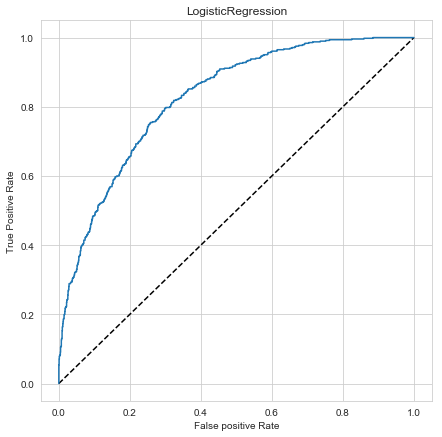

In [388]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label ='LogisticRegression')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression')
plt.show()

Using Ensemble Technique

In [389]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()

In [390]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [391]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [392]:
# Random search of parameters, using 5 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [393]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [394]:
rf_random.best_score_

-0.1986046687984227

In [395]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

accuracy_score: 0.7995802728226653
[[1286  135]
 [ 247  238]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1421
           1       0.64      0.49      0.55       485

    accuracy                           0.80      1906
   macro avg       0.74      0.70      0.71      1906
weighted avg       0.79      0.80      0.79      1906



Text(0.5, 77.01999999999997, 'Predicted label')

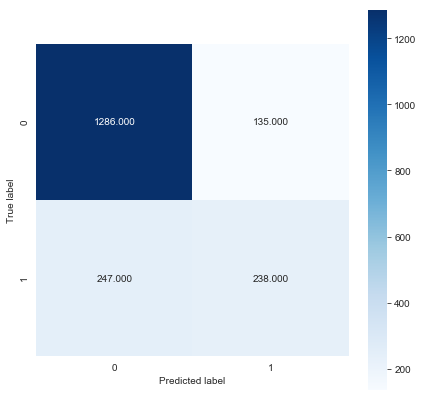

In [396]:
model_rf = RandomForestClassifier(n_estimators=300,min_samples_split=100,min_samples_leaf=5,max_features='auto',max_depth=15)
model_rf.fit(X_train,y_train)
y_predict= model_rf.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size":10}, 
            cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')